# Data cleaning for Job Posting Data:
:
_Author: Matěj Srna_
***
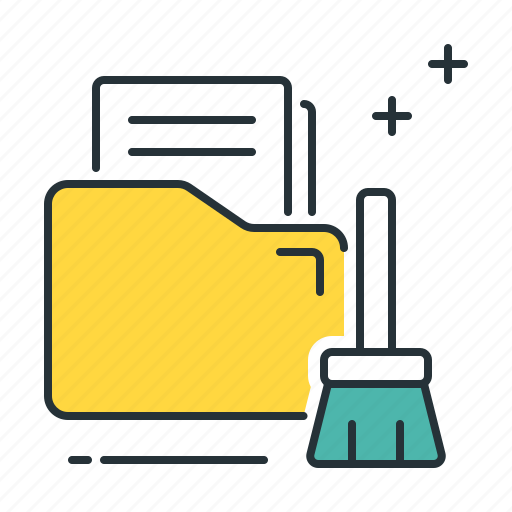
 
> _**Disclaimer: This Web Scraping is only used for the educational purposes**_

#### Content:
1. [Module imports](#Module-imports:)
2. [Import of the data from CSV](#Import-of-the-data-from-CSV:)
3. [Jobs filtering based on the key words](#Jobs-filtering-based-on-the-key-words:)
4. [Deleting all unnecessary job postings from the dataset](#Deleting-all-unnecessary-job-postings-from-the-dataset:)
5. [Saving the clean dataset to CSV for further analysis](#Saving-the-clean-dataset-to-CSV-for-further-analysis:)

### Module imports:

***
For this analysis, I had to import several libraries. Mainly I used Pandas to work easaly with Data in DataFrames.

Secondly I used the numpy to easily work with data. I used this library to put the date into the list.

***

In [76]:
import pandas as pd
from datetime import date
from time import sleep
import glob
import numpy as np

### Import of the data from CSV:

***
Here is the data loaded to the Pandas library. The cleaned and summarized data was prepared in the WebScraping tool where all the datasets from each day were merged together into one summarized dataset. To have an overview in size of the table I print the shape of the dataframe.
***

In [77]:
path =r"DATA/summary_data.csv"

raw_data = pd.read_csv(path)

In [78]:
print(f"Size of the table is: {raw_data.shape}")

Size of the table is: (1146, 8)


### Jobs filtering based on the key words:

***
This part of the code locates the names of the job postings which does not contain the keywords such as "Data, Analyst, Machine, Business, Science, and AI". This data will be deleted because it does not contain the relevant data for this analysis.

***

In [79]:
to_be_deleted_raw = raw_data.loc[~(raw_data["name"].str.contains(r"(Data)|(Analyst)|(Machine)|(Business)|(Science)|(AI)")),"name"].unique()
to_be_deleted_raw = np.ndarray.tolist(to_be_deleted_raw)
to_be_deleted = []
for n in range(len(to_be_deleted_raw)):
    new_value = to_be_deleted_raw[n]
    to_be_deleted.append(new_value)

print(to_be_deleted)

['Software Development Engineer (Computer Vision)', 'Software Engineer', 'Software Engineer / SW DEVELOPER, new project in Vienna, 12 various positions', 'Software Developer', 'C+ Vývojář / Analytik', 'Application Software Developer in C+/Python (f/m/d)', 'C+ Developer', 'Python Developer', 'Python developer intern', 'HTML Developer', 'Python Engineer', 'Python Developer (m/f/x)', 'SQL Programmer', 'Senior Computer Vision Engineer', 'User Experience Researcher', 'Senior Software Engineer', 'Senior Perception Engineer', 'Senior Engineer, Software Tools (Hybrid)', 'Bioinformatics Software Engineer II', 'Software Engineer, Hardware Integrations', 'Senior System Engineer', 'Software Engineer, Rendering', 'Senior Sensor Fusion Engineer', 'Software Development Engineer III', 'Senior Software Engineer, Algorithms', 'Senior Software Engineer, 3D Vision and SLAM', 'Staff Computer Vision Engineer', 'Image Signal Processing SW Engineer', 'Funkční SW vývojář pro e-mobilitu / motor control', 'Softw

C:\Users\srnam\AppData\Local\Temp\ipykernel_2732\312862364.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  to_be_deleted_raw = raw_data.loc[~(raw_data["name"].str.contains(r"(Data)|(Analyst)|(Machine)|(Business)|(Science)|(AI)")),"name"].unique()


### Deleting all unnecessary job postings from the dataset:

***
Based on the list created above I iterated the whole dataframe to make sure I drop all the unnecessary data. Therefore the dataset is free of all the job postings not related to this analysis. 
***

In [80]:
length = len(to_be_deleted)

for n in range(length): 
    #print(to_be_deleted[n])
    raw_data.drop(raw_data.index[raw_data["name"]==to_be_deleted[n]], inplace=True)

In [81]:
raw_data = raw_data.reset_index(drop=True)
clean_data = raw_data.drop_duplicates()
#print(raw_data)
clean_data.shape

(902, 8)

In [82]:
clean_data["name"].value_counts()

Data Scientist                                                                          479
Big Data Engineer                                                                        34
Junior Data Scientist                                                                    34
Data Scientist - TikTok Account                                                          30
Machine Learning Engineer                                                                23
Senior Data Scientist                                                                    21
Lead Data Scientist                                                                      20
Machine Learning SW Engineer                                                             20
Senior Data Scientist for Time Series projects                                           20
Data Scientist - Search                                                                  20
Embedded SW Engineer - Machine Learning                                         

In [83]:
#clear fo all data scientist
data_science_rem = ["Machine Learning Engineer", "Embedded SW Engineer - Machine Learning", "Machine Learning SW Engineer", "Data Science Engineer - ML Projects", "Data Scientist, TikTok Creation and Consumption",
                    "Data Scientist - TikTok Account", "Data Scientist - Search", "Data Scientist, Ads Analytics", "Associate, Data Science", "Data Scientist - Relationship discovery", "Data Scientist (SAS)",
                    "Data Scientist, Special Projects", "Data Scientist - Hybrid", "Data Scientist I", "Data Scientist - Risk Data Mining", "Data Scientist - Hybrid - Urgent", "Multi Asset  Quant/Data Scientist role",
                    "Data Scientist, Tiktok Ads- Growth Marketing", "NLP Researcher (Data Scientist)", "Data Scientist, Consultant", "Data Science Specialist", "Data Scientist - Tiktok Ads, Ads Measurement",
                    "Data Scientist- W2 ONLY", "Data Scientist - Marketing Analytics, Lakeland", "Data Scientist - NIH", "Data Scientist, User Growth - TikTok US - Tech Services",
                   ]

for n in data_science_rem:
    clean_data.loc[clean_data["name"] == n, "name"] = "Data Scientist"

    
#clear for all senior data scinetist    
data_science_s_rem = ["Senior Data analyst/Scientist", "Senior Data Scientist for Time Series projects", "Senior Data Engineer (Store No8 | Health & Wellness)", 
                      "Senior Machine Learning Engineer, Recommendation - US Tech Services", "Senior Software Engineer, Machine Learning Platform", "Python, Data Science and Machine Learning",
                      "Data Scientist II, Analytics", "Sr. Data Scientist", "Senior Data Scientist (Freelance)", "Data Scientist II, Product Analytics",
                     ]

for n in data_science_s_rem:
    clean_data.loc[clean_data["name"] == n, "name"] = "Senior Data Scientist"


#clear for all lead data scientist
data_science_l_rem = ["Software developer in the field of Machine Vision", "Tech Lead, Machine Learning Engineer, Recommendation & Algorithm"
    
    
                     ]

for n in data_science_l_rem:
    clean_data.loc[clean_data["name"] == n, "name"] = "Lead Data Scientist"


#clear for all data analyst
data_analyst_rem = ["Employee Benefits Underwriter - Data Analyst"
    
                   ]
for n in data_analyst_rem:
    clean_data.loc[clean_data["name"] == n, "name"] = "Data Analyst"

    
#clean for all Big data engineer
big_data_rem = ["Junior Java Software Engineer (Big Data processing and Data Mining)", "Full Stack Software Engineer (.NET and react.js), Data & Services, Locations Program", 
                "Data Engineer - Big Data + Digital Marketing", "Cloud Data Engineer | Renewable Energy Trading Firm | Boston", "Sr. Data Engineer", "Data Engineer II"
                    
               ]
for n in big_data_rem:
    clean_data.loc[clean_data["name"] == n, "name"] = "Big Data Engineer"


In [84]:
clean_data["name"].value_counts()

Data Scientist                      688
Senior Data Scientist                66
Big Data Engineer                    64
Junior Data Scientist                34
Lead Data Scientist                  33
Data Analyst                          6
AI Engineer                           4
Staff Data Scientist                  4
Senior Data Analyst                   1
Business Intelligence Developers      1
Data Crawling Engineer                1
Name: name, dtype: int64

In [85]:
# additional drop
print(f"Size of the table is: {clean_data.shape}")

Size of the table is: (902, 8)


In [86]:
clean_data = clean_data.drop_duplicates()
clean_data.shape

(902, 8)

In [87]:
clean_data["company_name"].value_counts()

LHH                    67
TikTok                 58
HP                     50
NXP Semiconductors     38
Merkle DACH            33
                       ..
Panera Bread            1
Tatari                  1
ArcSpan                 1
Glean                   1
MetLife Legal Plans     1
Name: company_name, Length: 122, dtype: int64

In [88]:
clean_data.loc[clean_data["location"] == "Praha", "location"] = "Hlavní město Praha, Česko"

clean_data.loc[clean_data["location"] == "New York, NY", "location"] = "New York, United States"  
clean_data.loc[clean_data["location"] == "New York City Metropolitan Area", "location"] = "New York, United States"

In [89]:
clean_data["location"].value_counts()

Hlavní město Praha, Česko           216
Brno                                 58
Austin, TX                           51
New York, United States              43
Mountain View, CA                    34
                                   ... 
Cincinnati, OH                        1
Cincinnati Metropolitan Area          1
Columbus, Ohio Metropolitan Area      1
Greater Seattle Area                  1
Cleveland, OH                         1
Name: location, Length: 72, dtype: int64

In [90]:
clean_data["date"].value_counts().sort_index()

2022-05-15    66
2022-05-16    65
2022-05-17    90
2022-05-18    78
2022-05-19    97
2022-05-20    65
2022-05-21    79
2022-05-22    56
2022-05-23    51
2022-05-24    95
2022-05-25    75
2022-05-26    85
Name: date, dtype: int64

### Saving the clean dataset to CSV for further analysis:

In [91]:
clean_data.to_csv("DATA/clean_data.csv", index=False)